# Part-A

# SVM Classification

In [122]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [123]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from google.colab import files
uploaded = files.upload()

In [125]:
#Read the dataset
f = pd.read_csv('forestfires.csv')
f

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [126]:
#To find whether there are any existing null values or not
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [127]:
#Count of duplicated rows
f[f.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [128]:
f1=f.drop_duplicates()
f1.head(60)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


<AxesSubplot:>

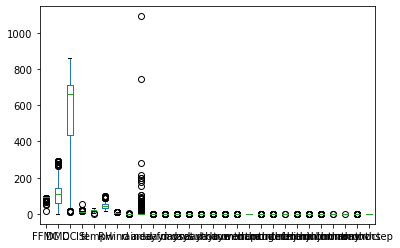

In [129]:
#Outlier Detection
f1.plot(kind='box')

<AxesSubplot:>

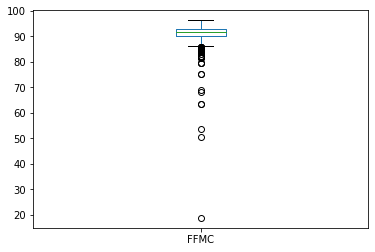

In [130]:
f1.FFMC.plot(kind='box')

In [131]:
f1.FFMC.describe()

count    509.000000
mean      90.618075
std        5.555527
min       18.700000
25%       90.200000
50%       91.600000
75%       92.900000
max       96.200000
Name: FFMC, dtype: float64

In [132]:
IQR = 92.900000 - 90.200000
IQR

2.700000000000003

In [133]:
#Calculation of lower fence
lower_fence = 90.200000 - (1.5*IQR)
lower_fence

86.15

In [134]:
index=f1[f1.FFMC<86.15].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

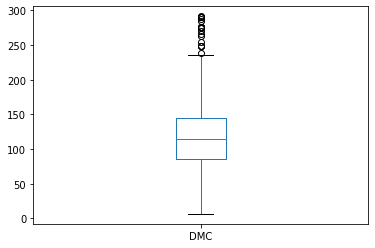

In [135]:
f1.DMC.plot(kind='box')

In [136]:
f1.DMC.describe()

count    456.000000
mean     119.788158
std       59.980378
min        6.600000
25%       85.250000
50%      114.300000
75%      145.400000
max      291.300000
Name: DMC, dtype: float64

In [137]:
IQR = 145.400000 - 85.250000
IQR

60.150000000000006

In [138]:
#Calculation of upper fence
upper_fence = 60.150000000000006 + (1.5*IQR)
upper_fence

150.375

In [139]:
index=f1[f1.DMC>150.375].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

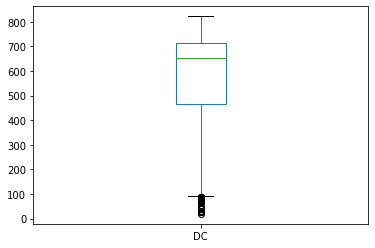

In [140]:
f1.DC.plot(kind='box')

In [141]:
f1.DC.describe()

count    356.000000
mean     547.388764
std      242.692661
min       18.700000
25%      464.425000
50%      654.100000
75%      714.000000
max      822.800000
Name: DC, dtype: float64

In [142]:
IQR = 714.000000 - 464.425000
IQR

249.575

In [143]:
#Calculation of lower fence
lower_fence = 464.425000 - (1.5*IQR)
lower_fence

90.06250000000006

In [144]:
index=f1[f1.DC<90.06250000000006].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

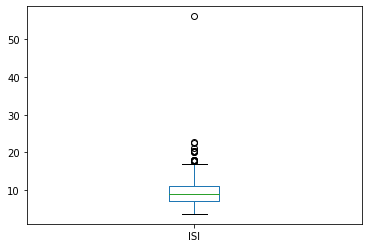

In [145]:
f1.ISI.plot(kind='box')

In [146]:
f1.ISI.describe()

count    315.000000
mean       9.869206
std        4.520157
min        3.700000
25%        7.000000
50%        8.900000
75%       11.000000
max       56.100000
Name: ISI, dtype: float64

In [147]:
IQR = 11.000000 - 7.000000
IQR

4.0

In [148]:
#Calculation of upper fence
upper_fence = 11.000000 + (1.5*IQR)
upper_fence

17.0

In [149]:
index=f1[f1.ISI>17.0].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

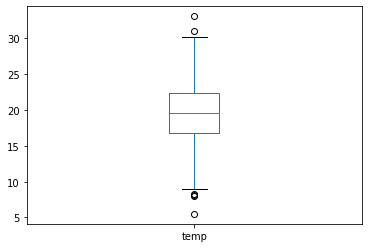

In [150]:
f1.temp.plot(kind='box')

In [151]:
f1.temp.describe()

count    296.000000
mean      19.419257
std        4.584373
min        5.500000
25%       16.800000
50%       19.600000
75%       22.325000
max       33.100000
Name: temp, dtype: float64

In [152]:
IQR = 22.325000 - 16.800000
IQR

5.524999999999999

In [153]:
#Calculation of lower fence
lower_fence = 16.800000 - (1.5*IQR)
lower_fence

8.512500000000003

In [154]:
#Calculation of upper fence
upper_fence = 22.325000 + (1.5*IQR)
upper_fence

30.612499999999997

In [155]:
index=f1[f1.temp<8.512500000000003].index
f1 = f1.drop(index,axis=0)

In [156]:
index=f1[f1.temp>30.612499999999997].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

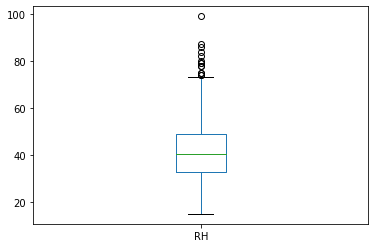

In [157]:
f1.RH.plot(kind='box')

In [158]:
f1.RH.describe()

count    290.000000
mean      42.513793
std       14.456287
min       15.000000
25%       33.000000
50%       40.500000
75%       49.000000
max       99.000000
Name: RH, dtype: float64

In [159]:
IQR = 49.000000 - 33.000000
IQR

16.0

In [160]:
#Calculation of upper fence
upper_fence = 49.000000 + (1.5*IQR)
upper_fence

73.0

In [161]:
index=f1[f1.RH>73.0].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

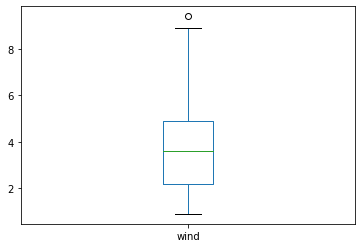

In [162]:
f1.wind.plot(kind='box')

In [163]:
f1.wind.describe()

count    276.000000
mean       3.725725
std        1.627589
min        0.900000
25%        2.200000
50%        3.600000
75%        4.900000
max        9.400000
Name: wind, dtype: float64

In [164]:
IQR = 4.900000 - 2.200000
IQR

2.7

In [165]:
#Calculation of upper fence
upper_fence = 4.900000 + (1.5*IQR)
upper_fence

8.950000000000001

In [166]:
index=f1[f1.wind>8.950000000000001].index
f1 = f1.drop(index,axis=0)

<AxesSubplot:>

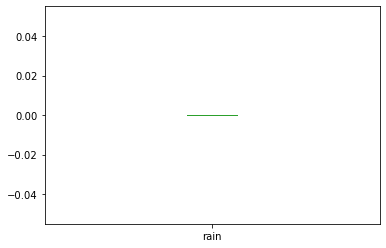

In [167]:
f1.rain.plot(kind='box')

In [168]:
array = f1.values
X = array[:,2:30]
Y = array[:,30]

In [169]:
X

array([[90.6, 35.4, 669.1, ..., 0, 1, 0],
       [90.6, 43.7, 686.9, ..., 0, 1, 0],
       [92.3, 85.3, 488.0, ..., 0, 0, 0],
       ...,
       [93.2, 114.4, 560.0, ..., 0, 0, 0],
       [94.9, 130.3, 587.1, ..., 0, 0, 0],
       [94.4, 146.0, 614.7, ..., 0, 0, 0]], dtype=object)

In [170]:
Y

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [172]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((220, 28), (220,), (55, 28), (55,))

# Grid Search CV

In [173]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'C':[15,14,13,12,11,10,1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1], 'kernel': ['rbf']}])

In [174]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'kernel': 'rbf'}, 0.8)

In [175]:
clf = SVC(kernel= "poly", C = 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 96.36363636363636


array([[16,  1],
       [ 1, 37]], dtype=int64)

# Part-B

# SVM Classification

In [176]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [177]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [178]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from google.colab import files
uploaded = files.upload()

In [179]:
#Read the dataset
s1 = pd.read_csv('SalaryData_Train(1).csv')
s1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from google.colab import files
uploaded = files.upload()

In [180]:
#Read the dataset
s2 = pd.read_csv('SalaryData_Test(1).csv')
s2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [181]:
#To find whether there are any existing null values or not
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [182]:
#To find whether there are any existing null values or not
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [183]:
#Count of duplicated rows
s1[s1.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [184]:
#Count of duplicated rows
s2[s2.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [185]:
s3=s1.drop_duplicates()
s3.tail(60)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30096,24,Private,Some-college,10,Married-civ-spouse,Other-service,Own-child,Asian-Pac-Islander,Female,0,0,35,United-States,<=50K
30097,51,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
30098,32,Private,Some-college,10,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
30099,61,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,Black,Male,0,0,40,United-States,<=50K
30100,33,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
30101,24,Private,11th,7,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
30102,26,Private,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,<=50K
30103,18,Private,11th,7,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K
30104,34,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,28,United-States,<=50K
30105,57,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [186]:
s4=s2.drop_duplicates()
s4.tail(60)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
14993,24,Private,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
14994,36,Local-gov,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,52,United-States,<=50K
14995,23,Private,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,20,United-States,<=50K
14996,36,Private,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
14997,52,Private,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Female,0,0,40,United-States,<=50K
14999,18,Private,HS-grad,9,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Female,0,0,15,United-States,<=50K
15000,32,Private,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1672,48,United-States,<=50K
15001,34,Self-emp-inc,HS-grad,9,Divorced,Sales,Unmarried,White,Male,0,0,50,United-States,>50K
15002,29,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,36,United-States,<=50K
15003,56,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:>

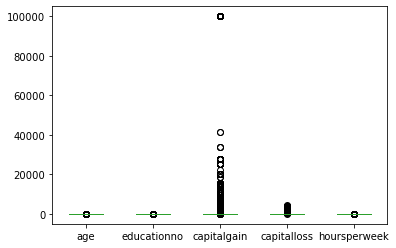

In [187]:
#Outlier Detection
s3.plot(kind='box')

<AxesSubplot:>

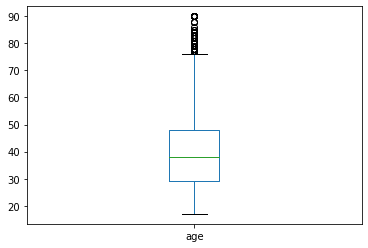

In [188]:
s3.age.plot(kind='box')

In [189]:
s3.age.describe()

count    26903.000000
mean        39.049140
std         13.188825
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [190]:
IQR = 48.000000 - 29.000000
IQR

19.0

In [191]:
#Calculation of upper fence
upper_fence = 48.000000 + (1.5*IQR)
upper_fence

76.5

In [192]:
index=s3[s3.age>76.5].index
s3 = s3.drop(index,axis=0)

<AxesSubplot:>

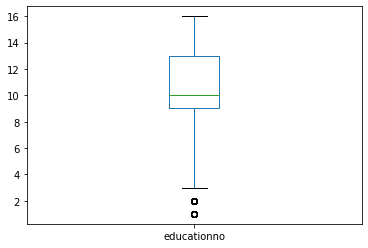

In [193]:
s3.educationno.plot(kind='box')

In [194]:
s3.educationno.describe()

count    26765.000000
mean        10.147656
std          2.614301
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educationno, dtype: float64

In [195]:
IQR = 13.000000 - 9.000000
IQR

4.0

In [196]:
#Calculation of lower fence
lower_fence = 13.000000 - (1.5*IQR)
lower_fence

7.0

In [197]:
index=s3[s3.educationno<7.0].index
s3 = s3.drop(index,axis=0)

<AxesSubplot:>

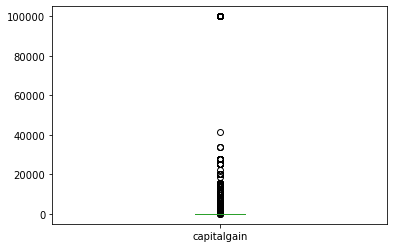

In [198]:
s3.capitalgain.plot(kind='box')

<AxesSubplot:>

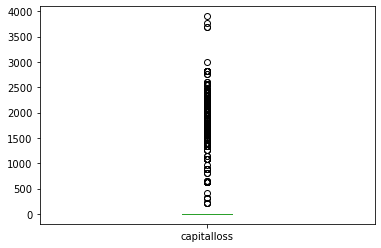

In [199]:
s3.capitalloss.plot(kind='box')

<AxesSubplot:>

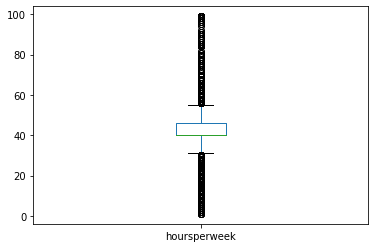

In [200]:
s3.hoursperweek.plot(kind='box')

In [201]:
s3.hoursperweek.describe()

count    24557.000000
mean        41.429287
std         12.267234
min          1.000000
25%         40.000000
50%         40.000000
75%         46.000000
max         99.000000
Name: hoursperweek, dtype: float64

In [202]:
IQR = 46.000000 - 40.000000
IQR

6.0

In [203]:
#Calculation of lower fence
lower_fence = 40.000000 - (1.5*IQR)
lower_fence

31.0

In [204]:
#Calculation of upper fence
upper_fence = 46.000000 + (1.5*IQR)
upper_fence

55.0

In [205]:
index=s3[s3.hoursperweek<31.0].index
s3 = s3.drop(index,axis=0)

In [206]:
index=s3[s3.hoursperweek>55.0].index
s3 = s3.drop(index,axis=0)

<AxesSubplot:>

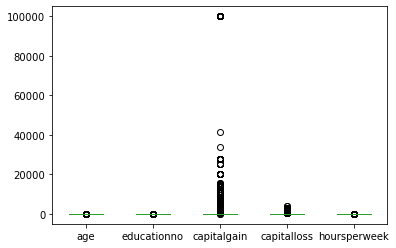

In [207]:
#Outlier Detection
s4.plot(kind='box')

<AxesSubplot:>

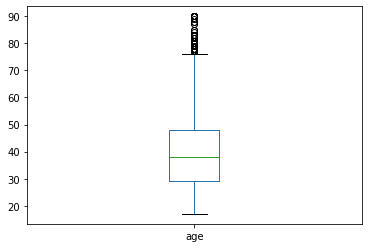

In [208]:
s4.age.plot(kind='box')

In [209]:
s4.age.describe()

count    14130.000000
mean        39.155414
std         13.429544
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [210]:
IQR = 48.000000 - 29.000000
IQR

19.0

In [211]:
#Calculation of upper fence
upper_fence = 48.000000 + (1.5*IQR)
upper_fence

76.5

In [212]:
index=s4[s4.age>76.5].index
s4 = s4.drop(index,axis=0)

<AxesSubplot:>

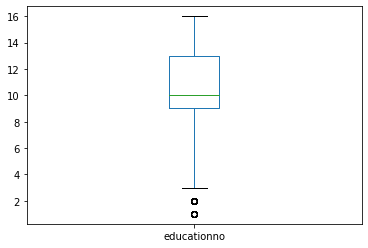

In [213]:
s4.educationno.plot(kind='box')

In [214]:
s4.educationno.describe()

count    14047.000000
mean        10.129423
std          2.591961
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educationno, dtype: float64

In [215]:
IQR = 13.000000 - 9.000000
IQR

4.0

In [216]:
#Calculation of lower fence
lower_fence = 9.000000 - (1.5*IQR)
lower_fence

3.0

In [217]:
index=s4[s4.educationno<3.0].index
s4 = s4.drop(index,axis=0)

<AxesSubplot:>

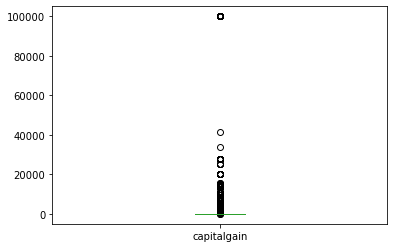

In [218]:
s4.capitalgain.plot(kind='box')

<AxesSubplot:>

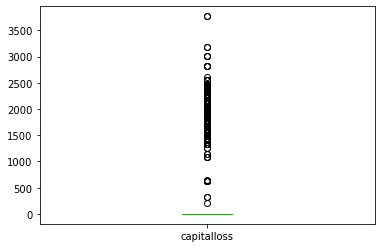

In [219]:
s4.capitalloss.plot(kind='box')

<AxesSubplot:>

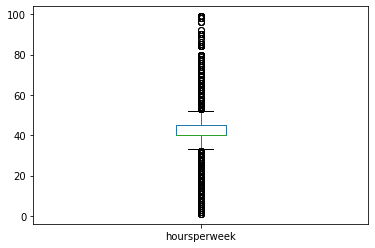

In [220]:
s4.hoursperweek.plot(kind='box')

In [221]:
s4.hoursperweek.describe()

count    13952.000000
mean        41.155748
std         12.214567
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

In [222]:
IQR = 45.000000 - 40.000000
IQR

5.0

In [223]:
#Calculation of lower fence
lower_fence = 40.000000 - (1.5*IQR)
lower_fence

32.5

In [224]:
#Calculation of upper fence
upper_fence = 45.000000 + (1.5*IQR)
upper_fence

52.5

In [225]:
index=s4[s4.hoursperweek<32.5].index
s4 = s4.drop(index,axis=0)

In [226]:
index=s4[s4.hoursperweek>52.5].index
s4 = s4.drop(index,axis=0)

In [227]:
#Converting the categorical data to Binary data
s3['workclass'] = s3['workclass'].astype('category').cat.codes
s3['education'] = s3['education'].astype('category').cat.codes
s3['maritalstatus'] = s3['maritalstatus'].astype('category').cat.codes
s3['occupation'] = s3['occupation'].astype('category').cat.codes
s3['relationship'] = s3['relationship'].astype('category').cat.codes
s3['race'] = s3['race'].astype('category').cat.codes
s3['sex'] = s3['sex'].astype('category').cat.codes
s3['native'] = s3['native'].astype('category').cat.codes
s3['Salary'] = s3['Salary'].astype('category').cat.codes
s3

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,4,13,4,0,1,4,1,2174,0,40,37,0
2,38,2,6,9,0,5,1,4,1,0,0,40,37,0
3,53,2,0,7,2,5,0,2,1,0,0,40,37,0
4,28,2,4,13,2,9,5,2,0,0,0,40,4,0
5,37,2,7,14,2,3,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,7,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,9,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,2,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,6,9,6,0,4,4,0,0,0,40,37,0


In [228]:
#Converting the categorical data to Binary data
s4['workclass'] = s4['workclass'].astype('category').cat.codes
s4['education'] = s4['education'].astype('category').cat.codes
s4['maritalstatus'] = s4['maritalstatus'].astype('category').cat.codes
s4['occupation'] = s4['occupation'].astype('category').cat.codes
s4['relationship'] = s4['relationship'].astype('category').cat.codes
s4['race'] = s4['race'].astype('category').cat.codes
s4['sex'] = s4['sex'].astype('category').cat.codes
s4['native'] = s4['native'].astype('category').cat.codes
s4['Salary'] = s4['Salary'].astype('category').cat.codes
s4

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,10,9,2,4,0,4,1,0,0,50,37,0
2,28,1,6,12,2,10,0,4,1,0,0,40,37,1
3,44,2,13,10,2,6,0,2,1,7688,0,40,37,1
6,24,2,13,10,4,7,4,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,48,1,11,14,0,7,1,4,1,0,0,40,37,0
15055,33,2,8,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,8,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,8,13,2,9,0,4,1,0,0,50,37,0


In [229]:
array = s3.values
X1 = array[:,0:13]
Y1 = array[:,13]

In [230]:
array = s4.values
X2 = array[:,0:13]
Y2 = array[:,13]

In [231]:
X1

array([[39,  5,  4, ...,  0, 40, 37],
       [38,  2,  6, ...,  0, 40, 37],
       [53,  2,  0, ...,  0, 40, 37],
       ...,
       [27,  2,  2, ...,  0, 38, 37],
       [58,  2,  6, ...,  0, 40, 37],
       [52,  3,  6, ...,  0, 40, 37]], dtype=int64)

In [232]:
Y1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [233]:
X2

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 10, ...,  0, 50, 37],
       [28,  1,  6, ...,  0, 40, 37],
       ...,
       [39,  2,  8, ...,  0, 36, 37],
       [38,  2,  8, ...,  0, 50, 37],
       [44,  2,  8, ...,  0, 40, 37]], dtype=int64)

In [234]:
Y2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [235]:
X_train, y_train, = X1,Y1

In [236]:
X_test, y_test, = X2,Y2

In [237]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18659, 13), (18659,), (10216, 13), (10216,))

In [238]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18659, 13), (18659,), (10216, 13), (10216,))

# Grid Search CV

In [239]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'C':[15,14,13,12,11,10,1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
clf = SVC(kernel= "poly", C = 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)